<a href="https://colab.research.google.com/github/rajatpal00/Close-Price--Prediction-of-Nifty50-/blob/main/Rajat_Pal_Capstone_project_on_Nifty50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capston Project**

We are given a Nifty50 data set for 20 years from jan 2000 to may 2021.

*The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange*



Data contain opening, closing, high and low price of each day, our task is to predict closing price for next days.

In [1]:
#importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone project/Yes bank share price/Nifty50_data.csv')

In [3]:
data_df.head(10)

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.20
1,2000-01-04,1594.40,1641.95,1594.40,1638.70
2,2000-01-05,1634.55,1635.50,1555.05,1595.80
3,2000-01-06,1595.80,1639.00,1595.80,1617.60
4,2000-01-07,1616.60,1628.25,1597.20,1613.30
5,2000-01-10,1615.65,1662.10,1614.95,1632.95
6,2000-01-11,1633.25,1639.90,1548.25,1572.50
7,2000-01-12,1572.30,1631.55,1571.70,1624.80
8,2000-01-13,1627.85,1671.15,1613.65,1621.40
9,2000-01-14,1622.15,1627.40,1591.40,1622.75


##**EDA**

In [4]:
# exploring for NA values
data_df.isna().sum()

Date      0
Open     35
High     35
Low      35
Close    35
dtype: int64

We can see that there are 35 values which are NA and all featuers have same na values that means market could be closed on that day, so it would be better to drop these na values

In [5]:
data_df.dropna(inplace=True)

In [6]:
data_df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5266 entries, 0 to 5300
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5266 non-null   object 
 1   Open    5266 non-null   float64
 2   High    5266 non-null   float64
 3   Low     5266 non-null   float64
 4   Close   5266 non-null   float64
dtypes: float64(4), object(1)
memory usage: 246.8+ KB


In [8]:
#converting the date in Datetime type
data_df['Date']= pd.to_datetime(data_df['Date'])

In [9]:
data_df.describe()

,Open,High,Low,Close
count,5266.000000,5266.000000,5266.000000,5266.000000
mean,5551.787316,5588.846043,5506.832156,5548.545092
std,3582.719644,3594.485464,3561.245855,3578.111274
min,853.000000,877.000000,849.950000,854.200000
25%,2057.987500,2074.525000,2045.950000,2058.750000
50%,5213.675049,5252.199951,5163.449951,5211.025000
75%,8261.987305,8308.112793,8216.375244,8262.199707
max,15371.450195,15431.750000,15243.400391,15314.700195


From describe we can see that all the data features are close to each other there is no difference in the values of these data

* Mean and meadian of data of every feature is some what close to each other.
* we can see that min value of these data start from $850$ and max value goes til
$15370$ which mean that range of data points is quite high.
* With the help of visualization graph we can see how in which year the values have gone high.


##**Data Visualization**

Lets start by ploting a line plot for close price with respect to time 

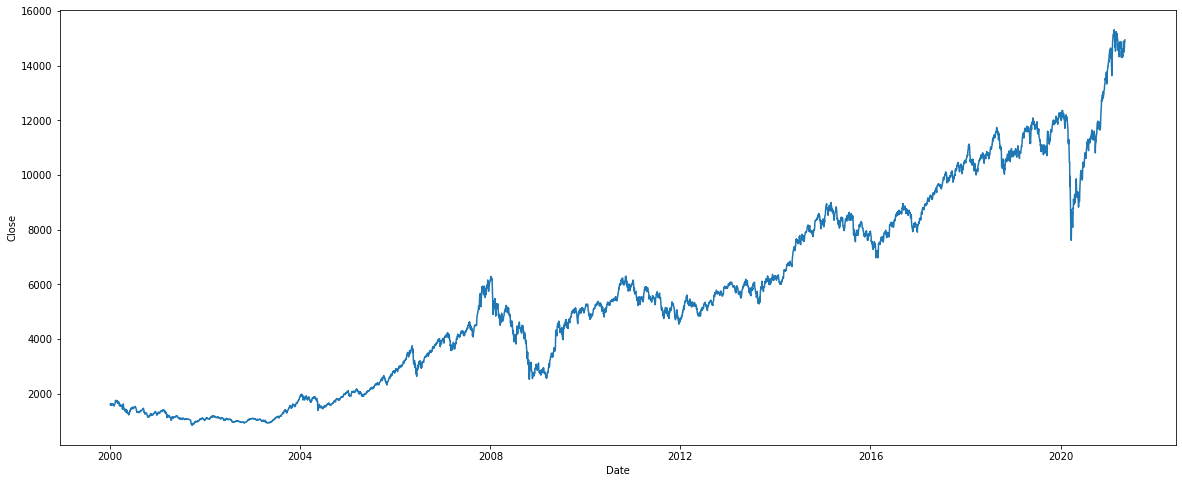

In [10]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date',y='Close',data= data_df)



BY looking at the line plot we can understand the **over all Trend** is **increasing** , As we  can see that in year 2000 close price started by close to 1600

In 2002 we recorded lowest close price for Nifty50

We can see increase and decrease in the close price as we move in time to 2021 but we cant see any **seasonality** so far in the plot.

In this plot we can see there are two places where the stock price droped drastically.
* we can see drastic drop in price in near near to 2008 that is cause by global regression of 2008
* Second drastic drop can be seen in 2020 due to lockdown which was implemented in the country.
* we can also witness exponential growth in the stocks price as the lockdown ended.

Apart from these time we dont see any significant drop or growth in stock price but **overall trend is Increasing**

Lets see how other feature such as opening, high, low have changed with respecct to time
 

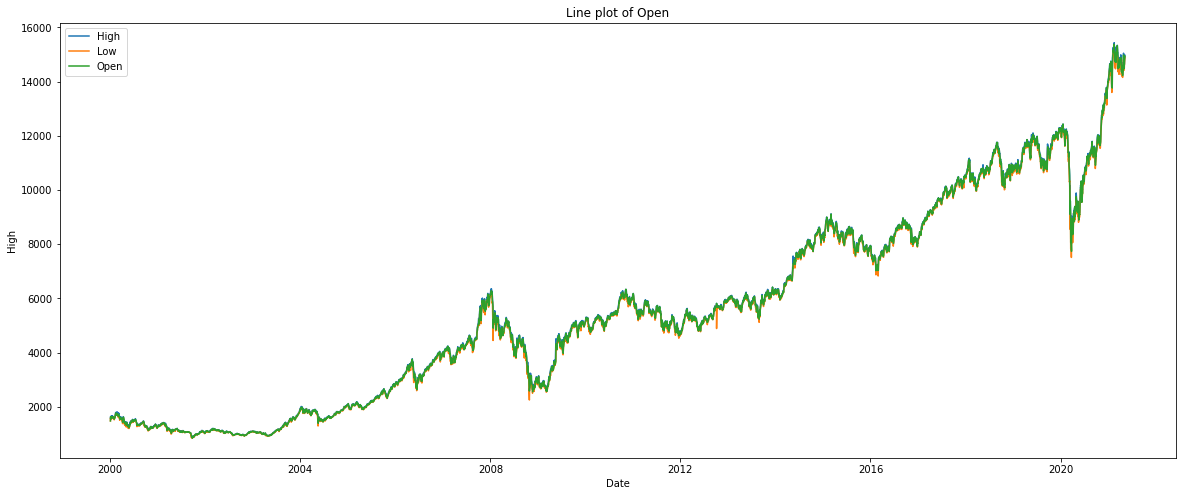

In [11]:
l= ['High',"Low",'Open']
plt.figure(figsize=(20,8))
for i in l:
  sns.lineplot(x='Date',y=i,data=data_df,label = i)
  title = 'Line plot of '+ i
  plt.title(title)
  

From above graph we can conclude that there is only minute difference in the features as the most of the values are overlapping with each other.

Lets see if histogram will give any information of the data


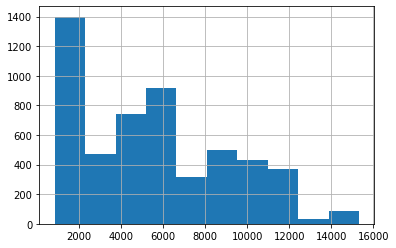

In [12]:
data_df['Close'].hist()

By histrogram we can see that most the days have closing price close to 2000 that is visible by line plot also as in intial years till 2006 we ccan see that stock price was close to 2000 only and it was after 2006 we see growth in stock price

In [13]:
# data_df.drop(['CLose'],axis=1,inplace=True)

In [14]:
data_df.set_index(["Date"],inplace =True)

checking for trend and seationality


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


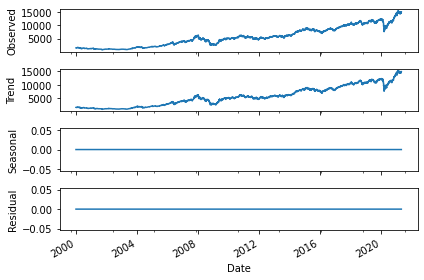

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
# series = data_df['Close']
result = seasonal_decompose(data_df['Close'], model='additive',freq=1)
result.plot()
plt.show()

### **cheacking Randomness of data**
Checking for randomness of data present in close price

As building a forcasting model on random time series is not possible

In [16]:
#lag plot for finding random in timeseries in data
from pandas.plotting import lag_plot

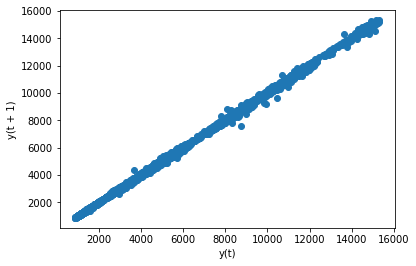

In [17]:
lag_plot(data_df['Close'])

so by above graph we can see that current value and previous value is linearly related so we can say that data is non- random and we can apply forcasting model on this

##**Stationary**

Checking of the dependend data is statinary or non-stationary with tyhe help of adfuller 

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adfuller_test(sales):
  result=adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
      print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
      print("weak evidence against null hypothesis,indicating it is non-stationary ")


In [20]:
adfuller_test(data_df['Close'])

ADF Test Statistic : 0.7938385840940094
p-value : 0.9915360574288862
#Lags Used : 29
Number of Observations : 5236
weak evidence against null hypothesis,indicating it is non-stationary 


lets do shift of data and then find the adfuller values

lets see auto corelation and partial auto corelation

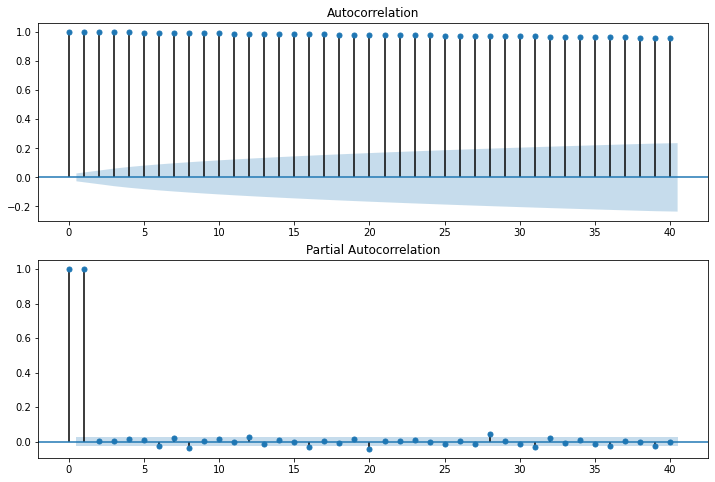

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_df['Close'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_df['Close'].dropna(),lags=40,ax=ax2)


In [22]:
data_df['Close First Difference'] = data_df['Close'] - data_df['Close'].shift(1)

In [23]:
data_df

,Open,High,Low,Close,Close First Difference
Date,,,,,
2000-01-03,1482.150000,1592.900000,1482.150000,1592.200000,NaN
2000-01-04,1594.400000,1641.950000,1594.400000,1638.700000,46.500000
2000-01-05,1634.550000,1635.500000,1555.050000,1595.800000,-42.900000
2000-01-06,1595.800000,1639.000000,1595.800000,1617.600000,21.800000
2000-01-07,1616.600000,1628.250000,1597.200000,1613.300000,-4.300000
...,...,...,...,...,...
2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000,-137.650391
2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,121.349609
2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,106.950196


In [24]:
adfuller_test(data_df['Close First Difference'].dropna())

ADF Test Statistic : -13.208863127403244
p-value : 1.0570660730866936e-24
#Lags Used : 28
Number of Observations : 5236
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Autocorelation and partial auto corelation

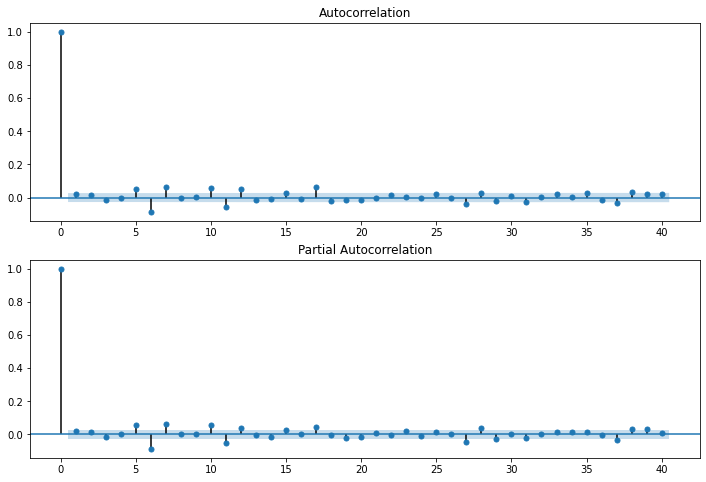

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_df['Close First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_df['Close First Difference'].dropna(),lags=40,ax=ax2)


Lets apply ARIMA model on this data frame and see how in works

In [26]:
#p=1,q=1,i=1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_df['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 5265
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -30450.305
Method:                       css-mle   S.D. of innovations             78.618
Date:                Fri, 14 May 2021   AIC                          60908.609
Time:                        16:25:55   BIC                          60934.884
Sample:                             1   HQIC                         60917.794
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5355      1.095      2.316      0.021       0.390       4.681
ar.L1.D.Close    -0.8483      0.058    -14.558      0.000      -0.962      -0.734
ma.L1.D.Close     0.8677      0.054     15.944      0.000       0.761       0.974
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1789           +0.0000j            1.1789            0.5000
MA.1           -1.1525           +0.0000j            1.1525            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
data_df.tail()

,Open,High,Low,Close,Close First Difference
Date,,,,,
2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000,-137.650391
2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,121.349609
2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,106.950196
2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391,98.350586
2021-05-10,14928.250000,14966.900391,14892.500000,14942.349609,119.199218


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


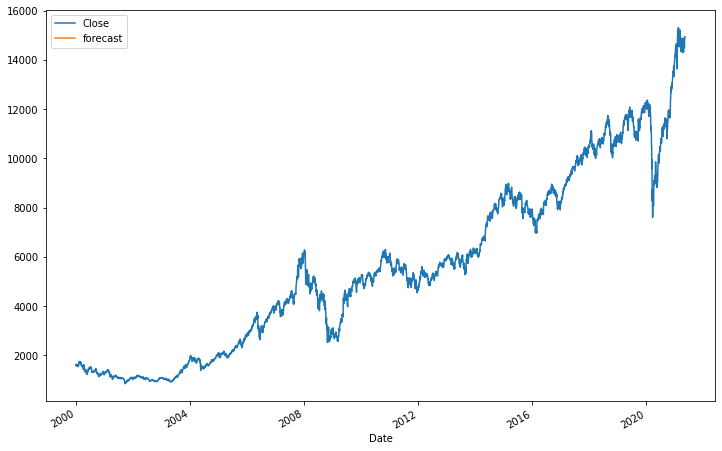

In [28]:
data_df['forecast']=model_fit.predict(start=3200,end=5300,dynamic=True)
data_df[['Close','forecast']].plot(figsize=(12,8))

## Classification problem

Lets try to solve this problem as classification problem

we can approach this problem by creating a binary target variable which we let us wheather your current day closing price is higher or lower than previous day closing price 

In [29]:
data_df.loc[(data_df['Close']-data_df['Close'].shift(1)) < 0,'Target']=1
data_df.loc[(data_df['Close']-data_df['Close'].shift(1)) >= 0,'Target']=0

In [30]:
data_df

,Open,High,Low,Close,Close First Difference,forecast,Target
Date,,,,,,,
2000-01-03,1482.150000,1592.900000,1482.150000,1592.200000,NaN,NaN,NaN
2000-01-04,1594.400000,1641.950000,1594.400000,1638.700000,46.500000,NaN,0.0
2000-01-05,1634.550000,1635.500000,1555.050000,1595.800000,-42.900000,NaN,1.0
2000-01-06,1595.800000,1639.000000,1595.800000,1617.600000,21.800000,NaN,0.0
2000-01-07,1616.600000,1628.250000,1597.200000,1613.300000,-4.300000,NaN,1.0
...,...,...,...,...,...,...,...
2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000,-137.650391,NaN,1.0
2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,121.349609,NaN,0.0
2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,106.950196,NaN,0.0


In [31]:
data_df.Target.value_counts()

0.0    2840
1.0    2425
Name: Target, dtype: int64

lets make few new features which will help in trainig our model. lets makes features.

Lets makes new features of each features lest take N=5 

In [32]:
def get_dataframe(word,n):
  feature = data_df[word].tolist()
  data=[]
  i=0
  while i+n < len(feature):
    new_list= feature[i:i+n]
    new_list.reverse()
    new_fet=[]
    for num in range(n):
      new_fet.append(word+str(num))
    new_tuple= dict(zip(new_fet,new_list))
    # print(new_tuple)
    data.append(new_tuple)
    i+=1

  dataframe_1 = pd.DataFrame(data)
  return dataframe_1
  

In [33]:
close_df = get_dataframe('Close',5)

In [34]:
open_df = get_dataframe('Open',5)

In [35]:
high_df = get_dataframe('High',5)

In [36]:
low_df= get_dataframe('Low',5)

In [37]:
featured_df = pd.concat([open_df,high_df,low_df,close_df],axis=1)

In [38]:
featured_df

,Open0,Open1,Open2,Open3,Open4,High0,High1,High2,High3,High4,Low0,Low1,Low2,Low3,Low4,Close0,Close1,Close2,Close3,Close4
0,1616.600000,1595.800000,1634.550000,1594.400000,1482.150000,1628.250000,1639.000000,1635.500000,1641.950000,1592.900000,1597.200000,1595.800000,1555.050000,1594.400000,1482.150000,1613.300000,1617.600000,1595.800000,1638.700000,1592.200000
1,1615.650000,1616.600000,1595.800000,1634.550000,1594.400000,1662.100000,1628.250000,1639.000000,1635.500000,1641.950000,1614.950000,1597.200000,1595.800000,1555.050000,1594.400000,1632.950000,1613.300000,1617.600000,1595.800000,1638.700000
2,1633.250000,1615.650000,1616.600000,1595.800000,1634.550000,1639.900000,1662.100000,1628.250000,1639.000000,1635.500000,1548.250000,1614.950000,1597.200000,1595.800000,1555.050000,1572.500000,1632.950000,1613.300000,1617.600000,1595.800000
3,1572.300000,1633.250000,1615.650000,1616.600000,1595.800000,1631.550000,1639.900000,1662.100000,1628.250000,1639.000000,1571.700000,1548.250000,1614.950000,1597.200000,1595.800000,1624.800000,1572.500000,1632.950000,1613.300000,1617.600000
4,1627.850000,1572.300000,1633.250000,1615.650000,1616.600000,1671.150000,1631.550000,1639.900000,1662.100000,1628.250000,1613.650000,1571.700000,1548.250000,1614.950000,1597.200000,1621.400000,1624.800000,1572.500000,1632.950000,1613.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5256,14481.049805,14747.349609,14979.000000,14710.500000,14493.799805,14673.849609,14855.450195,15044.349609,14890.250000,14667.549805,14416.250000,14601.700195,14814.450195,14694.950195,14484.849609,14634.150391,14631.099609,14894.900391,14864.549805,14653.049805
5257,14687.250000,14481.049805,14747.349609,14979.000000,14710.500000,14723.400391,14673.849609,14855.450195,15044.349609,14890.250000,14461.500000,14416.250000,14601.700195,14814.450195,14694.950195,14496.500000,14634.150391,14631.099609,14894.900391,14864.549805
5258,14604.150391,14687.250000,14481.049805,14747.349609,14979.000000,14637.900391,14723.400391,14673.849609,14855.450195,15044.349609,14506.599609,14461.500000,14416.250000,14601.700195,14814.450195,14617.849609,14496.500000,14634.150391,14631.099609,14894.900391
5259,14668.349609,14604.150391,14687.250000,14481.049805,14747.349609,14743.900391,14637.900391,14723.400391,14673.849609,14855.450195,14611.500000,14506.599609,14461.500000,14416.250000,14601.700195,14724.799805,14617.849609,14496.500000,14634.150391,14631.099609


In [39]:
data_df1= data_df.iloc[5:]

In [40]:
data_df1.drop(['Close First Difference','forecast'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
data_df1.reset_index(inplace=True)

In [42]:
final_df= pd.concat([data_df1,featured_df],axis=1)

In [43]:
final_df.set_index('Date',inplace=True)

In [44]:
final_df

,Open,High,Low,Close,Target,Open0,Open1,Open2,Open3,Open4,High0,High1,High2,High3,High4,Low0,Low1,Low2,Low3,Low4,Close0,Close1,Close2,Close3,Close4
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-10,1615.650000,1662.100000,1614.950000,1632.950000,0.0,1616.600000,1595.800000,1634.550000,1594.400000,1482.150000,1628.250000,1639.000000,1635.500000,1641.950000,1592.900000,1597.200000,1595.800000,1555.050000,1594.400000,1482.150000,1613.300000,1617.600000,1595.800000,1638.700000,1592.200000
2000-01-11,1633.250000,1639.900000,1548.250000,1572.500000,1.0,1615.650000,1616.600000,1595.800000,1634.550000,1594.400000,1662.100000,1628.250000,1639.000000,1635.500000,1641.950000,1614.950000,1597.200000,1595.800000,1555.050000,1594.400000,1632.950000,1613.300000,1617.600000,1595.800000,1638.700000
2000-01-12,1572.300000,1631.550000,1571.700000,1624.800000,0.0,1633.250000,1615.650000,1616.600000,1595.800000,1634.550000,1639.900000,1662.100000,1628.250000,1639.000000,1635.500000,1548.250000,1614.950000,1597.200000,1595.800000,1555.050000,1572.500000,1632.950000,1613.300000,1617.600000,1595.800000
2000-01-13,1627.850000,1671.150000,1613.650000,1621.400000,1.0,1572.300000,1633.250000,1615.650000,1616.600000,1595.800000,1631.550000,1639.900000,1662.100000,1628.250000,1639.000000,1571.700000,1548.250000,1614.950000,1597.200000,1595.800000,1624.800000,1572.500000,1632.950000,1613.300000,1617.600000
2000-01-14,1622.150000,1627.400000,1591.400000,1622.750000,0.0,1627.850000,1572.300000,1633.250000,1615.650000,1616.600000,1671.150000,1631.550000,1639.900000,1662.100000,1628.250000,1613.650000,1571.700000,1548.250000,1614.950000,1597.200000,1621.400000,1624.800000,1572.500000,1632.950000,1613.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000,1.0,14481.049805,14747.349609,14979.000000,14710.500000,14493.799805,14673.849609,14855.450195,15044.349609,14890.250000,14667.549805,14416.250000,14601.700195,14814.450195,14694.950195,14484.849609,14634.150391,14631.099609,14894.900391,14864.549805,14653.049805
2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,0.0,14687.250000,14481.049805,14747.349609,14979.000000,14710.500000,14723.400391,14673.849609,14855.450195,15044.349609,14890.250000,14461.500000,14416.250000,14601.700195,14814.450195,14694.950195,14496.500000,14634.150391,14631.099609,14894.900391,14864.549805
2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,0.0,14604.150391,14687.250000,14481.049805,14747.349609,14979.000000,14637.900391,14723.400391,14673.849609,14855.450195,15044.349609,14506.599609,14461.500000,14416.250000,14601.700195,14814.450195,14617.849609,14496.500000,14634.150391,14631.099609,14894.900391


## volatility 
Diffrence of high and low in a certain day

In [45]:
final_df['Volatility']= final_df['High']-final_df['Low']

### Moving average 

finding moving average different time period


In [46]:
def moving_avg(df,col, day):
  var_name = col + str(day)
  df[var_name + '_ma']= df[col]-df[col].rolling(window=day,min_periods=1).mean()
  df[var_name+ '_ewma']= df[col]-df[col].ewm(com=day).mean()
  return df



In [47]:
# findind mean average for 
days= [3,7,15,30,50]
cols= ['High','Low',"Open",'Close']
for col in cols:
  for day in days:
    moving_avg(final_df,col,day)

In [48]:
final_df.shape

(5261, 66)

In [49]:
final_df= final_df.drop(['High','Low','Open','Close'],axis=1)

#### Corelation of independent feature and dependent features

In [50]:
cor_matrix =abs( final_df.corr())

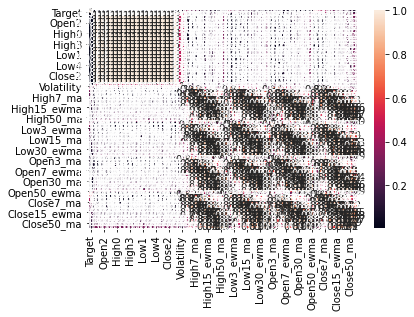

In [51]:
sns.heatmap(cor_matrix,annot = True)

In [52]:
cor_matrix['Target'].sort_values(ascending=False)

Target         1.000000
Close3_ma      0.572317
Close3_ewma    0.425850
Close7_ma      0.412414
Low3_ma        0.387116
                 ...   
Close1         0.005297
Open0          0.005023
Low0           0.004677
High0          0.004613
Close0         0.004285
Name: Target, Length: 62, dtype: float64

Spliting data into test train and validation

In [53]:
def temporal_splitting(data,date1,date2,date3):
    train=data.loc[(data.index >= date1) & (data.index < date2)]
    val=data.loc[(data.index >= date2) & (data.index < date3),:]
    test=data.loc[data.index >= date3]
    
    return train, val, test

i try to divide my training validation nad test data as 

* 16 years for training
* 3 year for validation
* 2 years for testing

In [54]:
train, val,test=temporal_splitting(final_df,'2000-01-01','2016-01-01','2019-06-01')

disrtibution for test , valiodatiuon and test

In [55]:
train.shape,val.shape,test.shape

((3948, 62), (837, 62), (476, 62))

fining indepenent and dependect variables

In [56]:
ind_var= final_df.columns.drop('Target')

In [57]:
ind_var

Index(['Open0', 'Open1', 'Open2', 'Open3', 'Open4', 'High0', 'High1', 'High2',
       'High3', 'High4', 'Low0', 'Low1', 'Low2', 'Low3', 'Low4', 'Close0',
       'Close1', 'Close2', 'Close3', 'Close4', 'Volatility', 'High3_ma',
       'High3_ewma', 'High7_ma', 'High7_ewma', 'High15_ma', 'High15_ewma',
       'High30_ma', 'High30_ewma', 'High50_ma', 'High50_ewma', 'Low3_ma',
       'Low3_ewma', 'Low7_ma', 'Low7_ewma', 'Low15_ma', 'Low15_ewma',
       'Low30_ma', 'Low30_ewma', 'Low50_ma', 'Low50_ewma', 'Open3_ma',
       'Open3_ewma', 'Open7_ma', 'Open7_ewma', 'Open15_ma', 'Open15_ewma',
       'Open30_ma', 'Open30_ewma', 'Open50_ma', 'Open50_ewma', 'Close3_ma',
       'Close3_ewma', 'Close7_ma', 'Close7_ewma', 'Close15_ma', 'Close15_ewma',
       'Close30_ma', 'Close30_ewma', 'Close50_ma', 'Close50_ewma'],
      dtype='object')

In [58]:
dept_var=['Target']

Defining training data

In [59]:
X_train= train[ind_var]
X_val = val[ind_var]
X_test = test[ind_var]

y_train= train[dept_var]
y_val = val[dept_var]
y_test = test[dept_var]

#### Obtaining the distribution of classes of dependent variable across three datasets

In [60]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

Target
0.0       2116
1.0       1832
dtype: int64
Target
0.0       453
1.0       384
dtype: int64
Target
0.0       269
1.0       207
dtype: int64


In [63]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=6fbc3d7de055355da9758a6bdd5908705893e321b93bd692c3c1340d5c365674
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [64]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit

import xgboost as xgb
import lightgbm as lgb
import bayes_opt as bayso
from sklearn.metrics import accuracy_score,confusion_matrix

In [65]:
def lgbcv1(min_child_weight,
           colsample_bytree,
           max_depth,
           subsample,
           min_gain_to_split,
           reg_alpha,
           reg_lambda):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting': 'gbdt',
        'random_state' : 501, # Updated from 'seed'
        'n_estimators' : 200,
        'learning_rate': 0.1,
        'early_stopping_round' : 10,
        'verbose': 20,
        'num_leaves': 65,
        'min_data_in_leaf': 500,
        'bagging_freq': 1,
        'bagging_seed': RS,
        'feature_fraction_seed': RS,
        'max_bin': 50,
        'min_child_weight': int(min_child_weight),
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_depth': int(max_depth),
        'subsample': max(min(subsample, 1), 0),
        'min_gain_to_split': max(min_gain_to_split,0),
        'reg_alpha': max(reg_alpha,0),
        'reg_lambda': max(reg_lambda,0)
    }


    cv_result = lgb.cv(params, lgtrain, nfold=5, seed=0, verbose_eval =200,stratified=False,shuffle=False)

    return max(cv_result['auc-mean'])

In [66]:
def prepare_data():
    lgtrain = lgb.Dataset(X_train, label=y_train)

    return lgtrain

In [67]:
if __name__ == '__main__':
    lgtrain =  prepare_data()
    random_state = 2020
    init_points = 30
    numitems=30
    RS = 20200801
    np.random.seed(RS)
    lgbo = bayso.BayesianOptimization(lgbcv1,
                                      {'min_child_weight': (300, 500),
                                      'colsample_bytree': (0.4, 0.7),
                                      'max_depth': (5, 7),
                                      'subsample': (0.3, 1.0),
                                      'min_gain_to_split': (0, 20),
                                      'reg_alpha': (0, 20),
                                      'reg_lambda': (0, 50)})
    
    lgbo.maximize(init_points=init_points, n_iter=numitems)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_ga... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.5      |  0.5147   |  6.334    |  486.7    |  18.83    |  11.82    |  18.69    |  0.3325   |
|  2        |  0.5      |  0.4416   |  5.497    |  420.3    |  8.054    |  1.115    |  32.78    |  0.779    |
|  3        |  0.5      |  0.5855   |  5.069    |  414.1    |  13.3     |  9.564    |  39.37    |  0.692    |
|  4        |  0.5      |  0.4494   |  5.08     |  433.1    |  5.496    |  19.17    |  49.92    |  0.5185   |
|  5        |  0.5      |  0.4651   |  6.815    |  488.0    |  9.885    |  14.08    |  45.97    |  0.7373   |
|  6        |  0.8644   |  0.5495   |  5.933    |  300.7    |  17.33    |  1.141    |  20.18    |  0.8452   |
|  7        |  0.5      |  0.4656   |  5.642    |  334.0    |  0.2742   |  18.73    |  24.55    |  0.7885   |
|  8      

In [68]:
len(lgbo.res)

60

### Finding optimal set of parameters

In [69]:
max_target=max([lgbo.res[elem]['target'] for elem in range(len(lgbo.res))])
opt_params=[elem['params'] for elem in lgbo.res if elem['target']==max_target][0]

### Updating the model parameters

In [70]:
opt_params.update({
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'random_state' : 501, # Updated from 'seed'
    'n_estimators' : 200,
    'learning_rate': 0.1,
    'early_stopping_round' : 10,
    'verbose': 20,
    'num_leaves': 65,
    'min_data_in_leaf': 500,
    'bagging_freq': 1,
    'bagging_seed': RS,
    'feature_fraction_seed': RS,
    'max_bin': 50})
opt_params['min_child_weight'] = int(opt_params['min_child_weight'])
opt_params['colsample_bytree'] = max(min(opt_params['colsample_bytree'], 1), 0)
opt_params['max_depth'] = int(opt_params['max_depth'])
opt_params['subsample'] = max(min(opt_params['subsample'], 1), 0)
opt_params['min_gain_to_split'] = max(opt_params['min_gain_to_split'],0)
opt_params['reg_alpha'] = max(opt_params['reg_alpha'],0)
opt_params['reg_lambda'] = max(opt_params['reg_lambda'],0)

In [71]:
opt_params

{'bagging_freq': 1,
 'bagging_seed': 20200801,
 'boosting': 'gbdt',
 'colsample_bytree': 0.7,
 'early_stopping_round': 10,
 'feature_fraction_seed': 20200801,
 'learning_rate': 0.1,
 'max_bin': 50,
 'max_depth': 7,
 'metric': 'auc',
 'min_child_weight': 300,
 'min_data_in_leaf': 500,
 'min_gain_to_split': 20.0,
 'n_estimators': 200,
 'num_leaves': 65,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 0.0,
 'reg_lambda': 50.0,
 'subsample': 1.0,
 'verbose': 20}

### Training the model on our optimal set of parameters

In [72]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [73]:
lgb_model = lgb.train(opt_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.859185
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.861899
[3]	valid_0's auc: 0.863057
[4]	valid_0's auc: 0.87003
[5]	valid_0's auc: 0.870424
[6]	valid_0's auc: 0.869427
[7]	valid_0's auc: 0.869427
[8]	valid_0's auc: 0.869427
[9]	valid_0's auc: 0.869427
[10]	valid_0's auc: 0.869427
[11]	valid_0's auc: 0.874451
[12]	valid_0's auc: 0.874451
[13]	valid_0's auc: 0.874451
[14]	valid_0's auc: 0.877673
[15]	valid_0's auc: 0.877673
[16]	valid_0's auc: 0.877673
[17]	valid_0's auc: 0.877679
[18]	valid_0's auc: 0.891763
[19]	valid_0's auc: 0.891763
[20]	valid_0's auc: 0.891775
[21]	valid_0's auc: 0.891775
[22]	valid_0's auc: 0.911424
[23]	valid_0's auc: 0.911424
[24]	valid_0's auc: 0.911424
[25]	valid_0's auc: 0.911424
[26]	valid_0's auc: 0.911424
[27]	valid_0's auc: 0.911593
[28]	valid_0's auc: 0.9113
[29]	valid_0's auc: 0.9113
[30]	valid_0's auc: 0.9113
[31]	valid_0's auc: 0.9113
[32]	valid_0's auc: 0.9113
[33]	valid_0's auc: 0.9113
[34

### Getting model probabilities on the three datasets

In [74]:
train_preds_lgb=lgb_model.predict(X_train)
val_preds_lgb=lgb_model.predict(X_val)
test_preds_lgb=lgb_model.predict(X_test)

In [75]:
train_preds_lgb

array([0.45557712, 0.81403104, 0.14303023, ..., 0.17576533, 0.81119446,
       0.15470291])

### Evaluating model performance using metrics like roc-auc and confusion matrix

In [76]:
# Convert the probs to classes
train_preds_lgb = np.where(train_preds_lgb > 0.5,1,0)
val_preds_lgb   = np.where(val_preds_lgb > 0.5,1,0)
test_preds_lgb  = np.where(test_preds_lgb > 0.5,1,0)

In [77]:
train_preds_lgb

array([0, 1, 0, ..., 0, 1, 0])

In [78]:
print(accuracy_score(y_train,train_preds_lgb))
print(accuracy_score(y_val,val_preds_lgb))
print(accuracy_score(y_test,test_preds_lgb))

0.8609422492401215
0.8626045400238949
0.8529411764705882


In [79]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train,train_preds_lgb)
conf_matrix_val = confusion_matrix(y_val,val_preds_lgb)
conf_matrix_test = confusion_matrix(y_test,test_preds_lgb)
print("The Confusion Matrix for Train Set \n",conf_matrix_train)
print("\n")
print("The Confusion Matrix for Validation Set \n",conf_matrix_val)
print("\n")
print("The Confusion Matrix for Test Set \n",conf_matrix_test)

The Confusion Matrix for Train Set 
 [[1844  272]
 [ 277 1555]]


The Confusion Matrix for Validation Set 
 [[408  45]
 [ 70 314]]


The Confusion Matrix for Test Set 
 [[236  33]
 [ 37 170]]


### Feature Importance
using shap 

In [81]:
pip install shap

     |████████████████████████████████| 358kB 3.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491616 sha256=6863a1368d40f5685cce9f9ef9f7fee0ad6eab21b4b94e2f4d785d30b7768426
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [80]:
import shap


ModuleNotFoundError: ignored

Feature importance in Training set

In [ ]:
X_shap=X_train
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_shap)

In [ ]:
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

**0 = close price  increase**

**1 = close price  decrease**

Here with this shap plot we can understand that
*  ***Higher the value of close3_ma  means that close price will be higher than previous day***
*  whereas higher exponential weighted moving avg will give mean  that price will decrease 

Feature importance in validation set

In [ ]:
X_shap=X_val
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_shap)

In [ ]:
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

Feature importance in training set

In [ ]:
X_shap=X_train
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_shap)

In [ ]:
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate    #Additional scklearn functions
  
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

##XGboost 

In [ ]:
xb_model= XGBClassifier(gamma=20)

In [ ]:
xb_model.fit(X_train,y_train)

In [ ]:
y_train_pred = xb_model.predict(X_train)

In [ ]:
y_train_pred

In [ ]:
accuracy_score(y_train,y_train_pred)

In [ ]:
accuracy_score(y_test,y_test_pred)

In [ ]:
y_test_pred = xb_model.predict(X_test)